# Proyecto Semestral: Modelos Temporales

Importamos la base de datos de un Ticker en especial que contiene los precios de sus Stocks y los volúmenes transados para cada día transable desde [Yahoo Finance!](https://finance.yahoo.com/).

In [41]:
import yfinance as yf
from datetime import date
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Ticker arbitrario
tickers = ['BABA', 'TSLA', 'FB', 'MA'] # Alibaba, Tesla, Facebook, Mastercard

# Año inicial
anho = 2010

# Bases de datos de los ticker
dfs = {}
for ticker in tickers:
    dfs[ticker] = yf.download(ticker, start=f"{anho}-01-01", end=date.today()).reset_index().round(2)
    display(dfs[ticker].head())

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-19,92.70,99.70,89.95,93.89,93.89,271879400
1,2014-09-22,92.70,92.95,89.50,89.89,89.89,66657800
2,2014-09-23,88.94,90.48,86.62,87.17,87.17,39009800
3,2014-09-24,88.47,90.57,87.22,90.57,90.57,32088000
4,2014-09-25,91.09,91.50,88.50,88.92,88.92,28598000


[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.80,5.00,3.51,4.78,4.78,93831500
1,2010-06-30,5.16,6.08,4.66,4.77,4.77,85935500
2,2010-07-01,5.00,5.18,4.05,4.39,4.39,41094000
3,2010-07-02,4.60,4.62,3.74,3.84,3.84,25699000
4,2010-07-06,4.00,4.00,3.17,3.22,3.22,34334500


[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.05,45.00,38.00,38.23,38.23,573576400
1,2012-05-21,36.53,36.66,33.00,34.03,34.03,168192700
2,2012-05-22,32.61,33.59,30.94,31.00,31.00,101786600
3,2012-05-23,31.37,32.50,31.36,32.00,32.00,73600000
4,2012-05-24,32.95,33.21,31.77,33.03,33.03,50237200


[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,25.80,25.82,25.61,25.68,24.24,9321000
1,2010-01-05,25.78,25.80,25.31,25.61,24.17,12906000
2,2010-01-06,25.62,25.62,25.25,25.56,24.13,10785000
3,2010-01-07,25.34,25.41,25.10,25.39,23.97,11273000
4,2010-01-08,25.23,25.49,25.17,25.40,23.98,8635000


---
## EDA
---

Comenzamos el análisis exploratorio de datos viendo lads estadísticas básicas de nuestra base de datos. 

In [43]:
# Estadísticas Básicas
for ticker in tickers:
    display(dfs[ticker].describe().round(2))

,Open,High,Low,Close,Adj Close,Volume
count,1693.00,1693.00,1693.00,1693.00,1693.00,1.693000e+03
mean,153.52,155.26,151.46,153.39,153.39,1.757795e+07
std,61.75,62.38,60.88,61.68,61.68,1.208415e+07
min,57.30,58.65,57.20,57.39,57.39,3.775300e+06
25%,91.69,92.80,90.46,91.00,91.00,1.123200e+07
50%,162.82,164.98,160.10,162.37,162.37,1.495010e+07
75%,192.75,195.15,189.91,192.74,192.74,2.036350e+07
max,313.50,319.32,308.91,317.14,317.14,2.718794e+08


,Open,High,Low,Close,Adj Close,Volume
count,2757.00,2757.00,2757.00,2757.00,2757.00,2.757000e+03
mean,86.69,88.58,84.60,86.71,86.71,3.183143e+07
std,157.59,161.18,153.40,157.59,157.59,2.880262e+07
min,3.23,3.33,3.00,3.16,3.16,5.925000e+05
25%,7.84,7.94,7.77,7.85,7.85,1.193600e+07
50%,45.34,45.97,44.44,45.21,45.21,2.538450e+07
75%,62.97,63.92,61.91,63.07,63.07,4.086700e+07
max,891.38,900.40,871.60,883.09,883.09,3.046940e+08


,Open,High,Low,Close,Adj Close,Volume
count,2280.00,2280.00,2280.00,2280.00,2280.00,2.280000e+03
mean,132.11,133.67,130.53,132.15,132.15,3.152530e+07
std,75.51,76.43,74.62,75.56,75.56,2.806160e+07
min,18.08,18.27,17.55,17.73,17.73,5.913100e+06
25%,74.17,74.79,73.43,74.04,74.04,1.610635e+07
50%,127.80,128.78,126.84,127.84,127.84,2.291790e+07
75%,181.46,183.44,179.44,181.42,181.42,3.672195e+07
max,336.70,338.30,332.24,336.58,336.58,5.735764e+08


,Open,High,Low,Close,Adj Close,Volume
count,2879.00,2879.00,2879.00,2879.00,2879.00,2.879000e+03
mean,128.20,129.45,126.87,128.19,125.85,6.461022e+06
std,101.13,102.21,99.91,101.06,101.30,6.507060e+06
min,19.27,19.67,19.10,19.20,18.15,6.411000e+05
25%,47.36,47.70,47.06,47.51,45.14,3.234750e+06
50%,92.14,92.84,91.55,92.31,89.10,4.605000e+06
75%,197.48,199.72,194.96,197.54,194.65,7.455500e+06
max,391.50,401.50,390.70,395.65,395.65,1.083800e+08


No hay faltantes

In [44]:
# Estadísticas Básicas
for ticker in tickers:
    display(dfs[ticker].dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Los tipos de datos tienen sentido

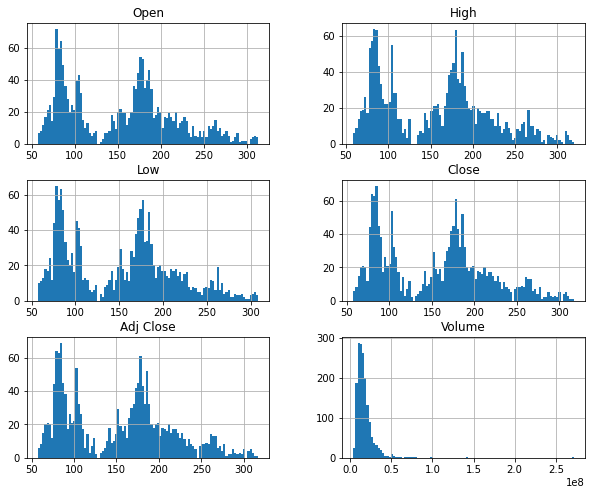

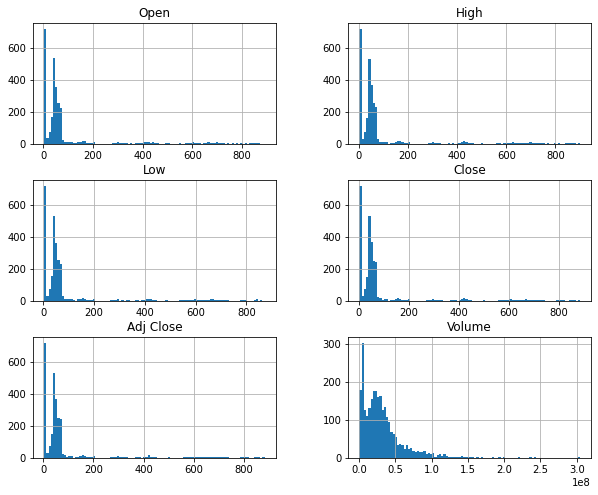

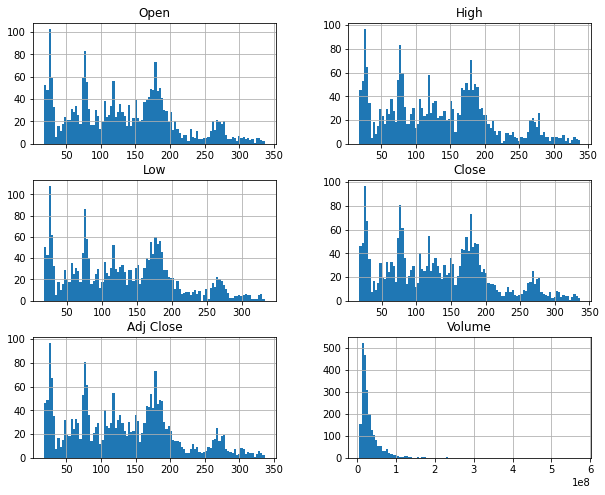

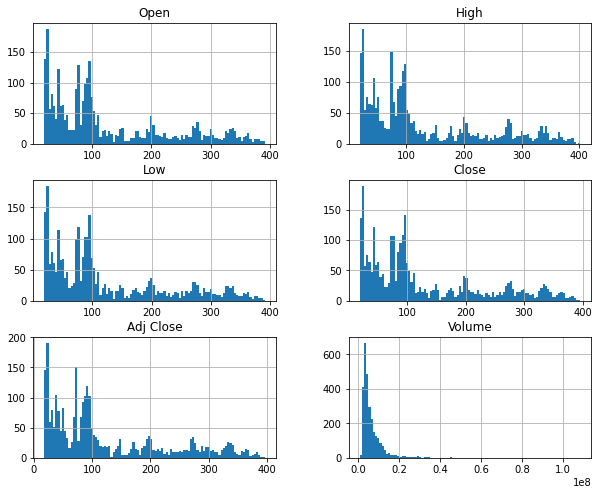

In [46]:
# Distribuciones
for ticker in tickers:
    dfs[ticker].drop('Date',axis=1).hist(bins=100, figsize=(10,8))
    plt.show()

Gráfico de las temporales

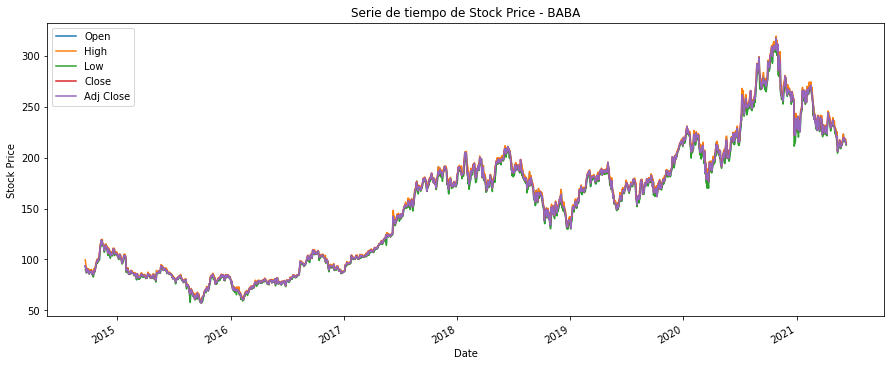

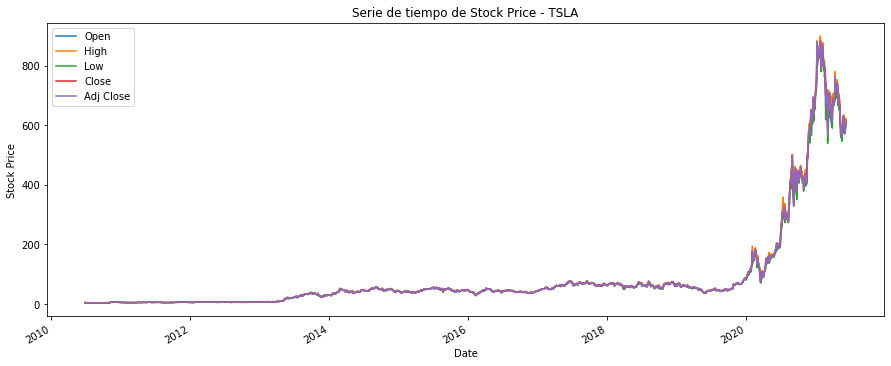

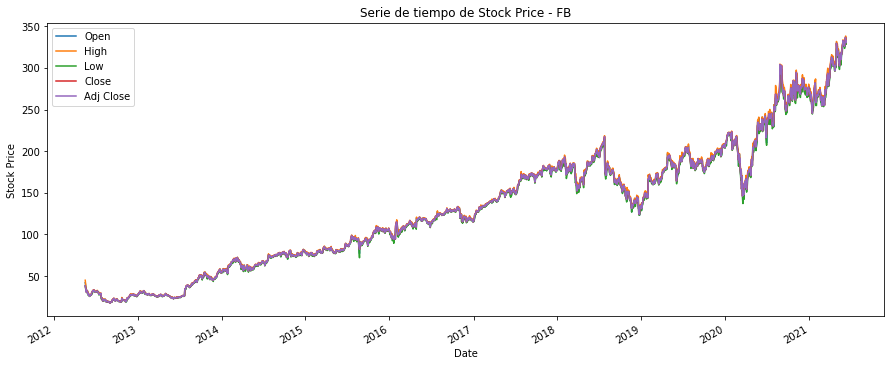

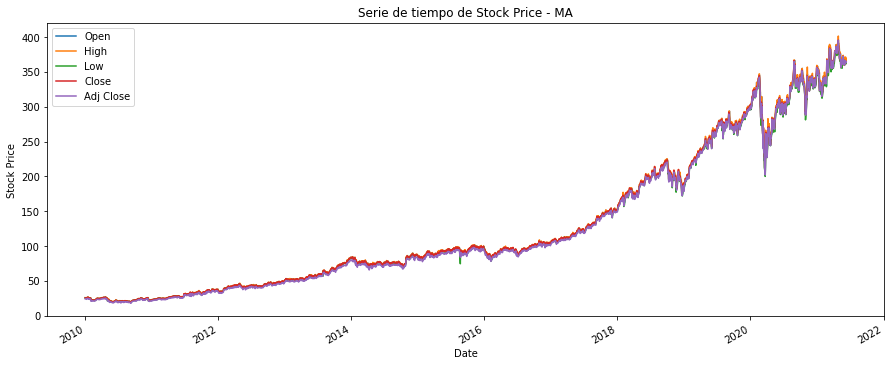

In [49]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

# Series de tiempo
for ticker in tickers:
    dfs[ticker].drop(columns=['Volume'], axis=1).plot(x='Date')
    plt.title(f'Serie de tiempo de Stock Price - {ticker}')
    plt.ylabel('Stock Price')
    plt.show()

Agregamos una columna de diferencias de precio. Incluimos la diferencia tal cual y también la diferencia normalizada por el precio Close del día anterior:

In [51]:
for ticker in tickers:

    # Precio de cierre
    close_price = dfs[ticker].Close.to_numpy()

    # Lags temporales (t-1)
    dfs[ticker].loc[1:, 'Lags'] = close_price[:-1]

    # Diferencia común
    dfs[ticker]['Diff'] = dfs[ticker]['Close'] - dfs[ticker]['Lags']

    # Diferencia porcentual
    dfs[ticker]['Per_Diff'] = (dfs[ticker]['Close'] - dfs[ticker]['Lags'])/dfs[ticker]['Lags']

    display(dfs[ticker].head())

,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff
0,2014-09-19,92.70,99.70,89.95,93.89,93.89,271879400,NaN,NaN,NaN
1,2014-09-22,92.70,92.95,89.50,89.89,89.89,66657800,93.89,-4.00,-0.042603
2,2014-09-23,88.94,90.48,86.62,87.17,87.17,39009800,89.89,-2.72,-0.030259
3,2014-09-24,88.47,90.57,87.22,90.57,90.57,32088000,87.17,3.40,0.039004
4,2014-09-25,91.09,91.50,88.50,88.92,88.92,28598000,90.57,-1.65,-0.018218


,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff
0,2010-06-29,3.80,5.00,3.51,4.78,4.78,93831500,NaN,NaN,NaN
1,2010-06-30,5.16,6.08,4.66,4.77,4.77,85935500,4.78,-0.01,-0.002092
2,2010-07-01,5.00,5.18,4.05,4.39,4.39,41094000,4.77,-0.38,-0.079665
3,2010-07-02,4.60,4.62,3.74,3.84,3.84,25699000,4.39,-0.55,-0.125285
4,2010-07-06,4.00,4.00,3.17,3.22,3.22,34334500,3.84,-0.62,-0.161458


,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff
0,2012-05-18,42.05,45.00,38.00,38.23,38.23,573576400,NaN,NaN,NaN
1,2012-05-21,36.53,36.66,33.00,34.03,34.03,168192700,38.23,-4.20,-0.109861
2,2012-05-22,32.61,33.59,30.94,31.00,31.00,101786600,34.03,-3.03,-0.089039
3,2012-05-23,31.37,32.50,31.36,32.00,32.00,73600000,31.00,1.00,0.032258
4,2012-05-24,32.95,33.21,31.77,33.03,33.03,50237200,32.00,1.03,0.032188


,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff
0,2010-01-04,25.80,25.82,25.61,25.68,24.24,9321000,NaN,NaN,NaN
1,2010-01-05,25.78,25.80,25.31,25.61,24.17,12906000,25.68,-0.07,-0.002726
2,2010-01-06,25.62,25.62,25.25,25.56,24.13,10785000,25.61,-0.05,-0.001952
3,2010-01-07,25.34,25.41,25.10,25.39,23.97,11273000,25.56,-0.17,-0.006651
4,2010-01-08,25.23,25.49,25.17,25.40,23.98,8635000,25.39,0.01,0.000394


Serie temporal de las diferencias de precio

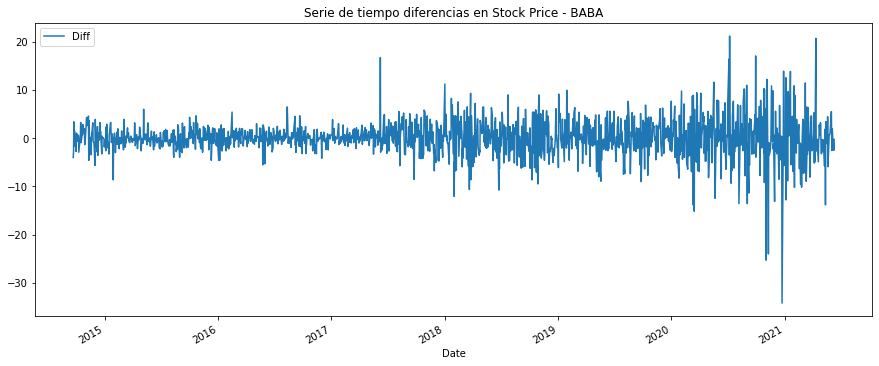

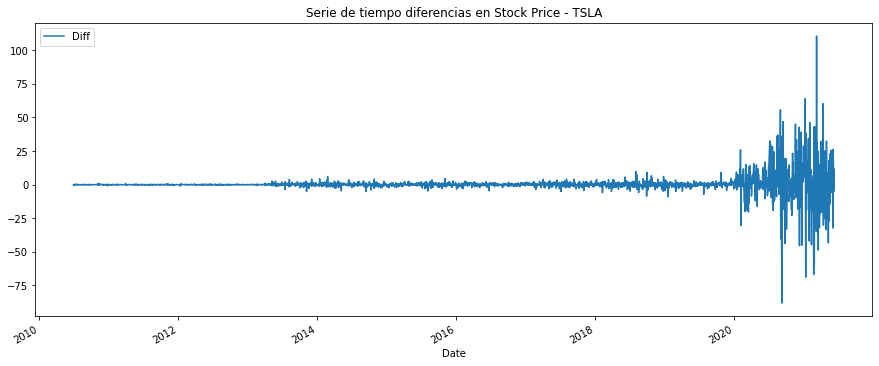

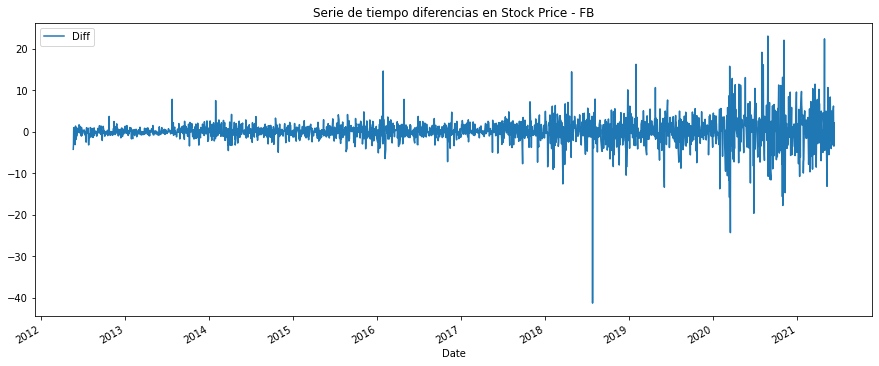

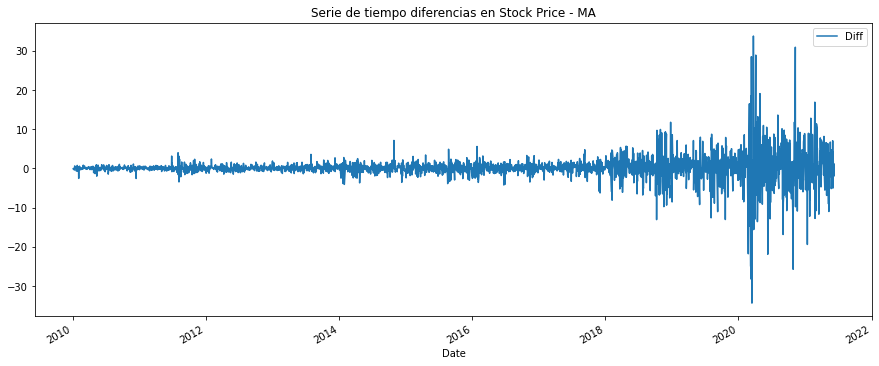

In [53]:
for ticker in tickers:

    # Serie de tiempo común
    dfs[ticker][['Date', 'Diff']].plot(x='Date')
    plt.title(f'Serie de tiempo diferencias en Stock Price - {ticker}')
    plt.show()

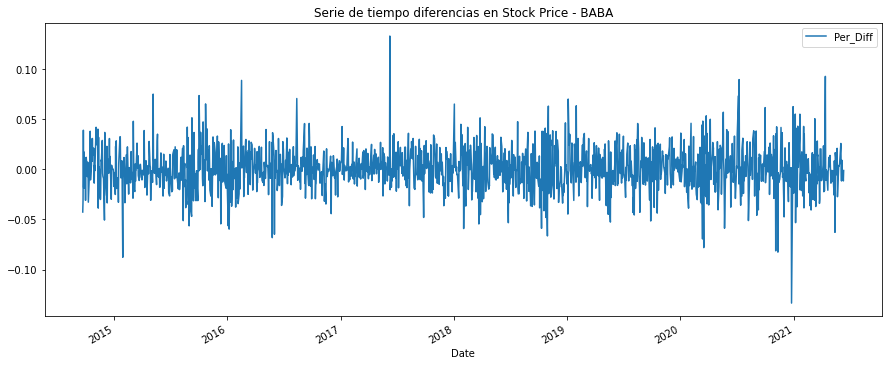

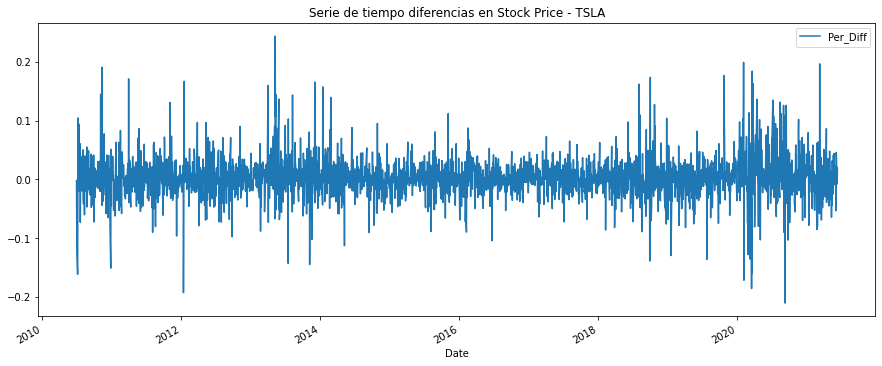

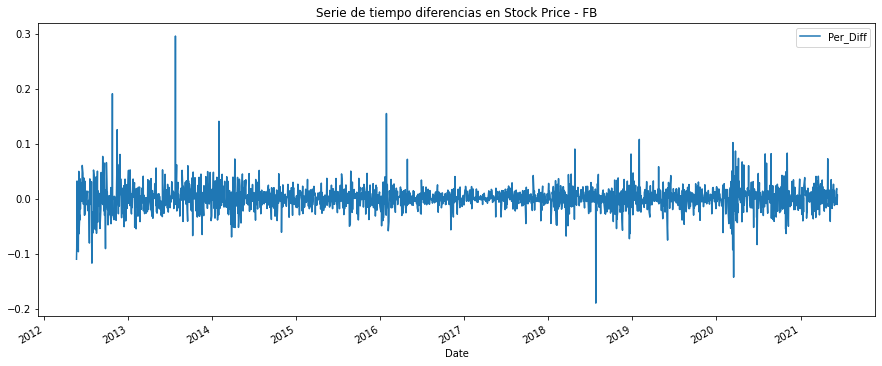

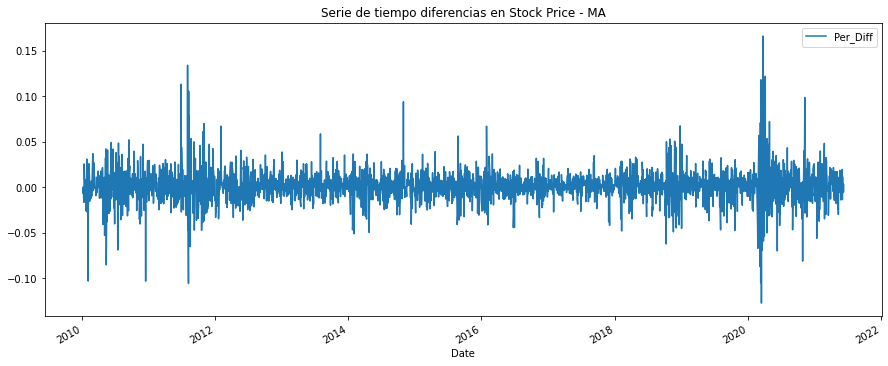

In [54]:
for ticker in tickers:

    # Serie de tiempo porcentual
    dfs[ticker][['Date', 'Per_Diff']].plot(x='Date')
    plt.title(f'Serie de tiempo diferencias en Stock Price - {ticker}')
    plt.show()

Más datos temporales

In [60]:
# Información de fechas

for ticker in tickers:
    dfs[ticker]['Week']  = dfs[ticker].Date.dt.isocalendar().week
    dfs[ticker]['Month'] = dfs[ticker].Date.dt.month
    dfs[ticker]['Year']  = dfs[ticker].Date.dt.year
    dfs[ticker]['Week Day'] = dfs[ticker].Date.dt.day_of_week
    dfs[ticker]['Month Day']   = dfs[ticker].Date.dt.day
    dfs[ticker]['Year Day'] = dfs[ticker].Date.dt.day_of_year
    display(dfs[ticker].head())

,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff,Day,Week,Month,Year,Week Day,Year Day,Month Day
0,2014-09-19,92.70,99.70,89.95,93.89,93.89,271879400,NaN,NaN,NaN,19,38,9,2014,4,262,19
1,2014-09-22,92.70,92.95,89.50,89.89,89.89,66657800,93.89,-4.00,-0.042603,22,39,9,2014,0,265,22
2,2014-09-23,88.94,90.48,86.62,87.17,87.17,39009800,89.89,-2.72,-0.030259,23,39,9,2014,1,266,23
3,2014-09-24,88.47,90.57,87.22,90.57,90.57,32088000,87.17,3.40,0.039004,24,39,9,2014,2,267,24
4,2014-09-25,91.09,91.50,88.50,88.92,88.92,28598000,90.57,-1.65,-0.018218,25,39,9,2014,3,268,25


,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff,Day,Week,Month,Year,Week Day,Year Day,Month Day
0,2010-06-29,3.80,5.00,3.51,4.78,4.78,93831500,NaN,NaN,NaN,29,26,6,2010,1,180,29
1,2010-06-30,5.16,6.08,4.66,4.77,4.77,85935500,4.78,-0.01,-0.002092,30,26,6,2010,2,181,30
2,2010-07-01,5.00,5.18,4.05,4.39,4.39,41094000,4.77,-0.38,-0.079665,1,26,7,2010,3,182,1
3,2010-07-02,4.60,4.62,3.74,3.84,3.84,25699000,4.39,-0.55,-0.125285,2,26,7,2010,4,183,2
4,2010-07-06,4.00,4.00,3.17,3.22,3.22,34334500,3.84,-0.62,-0.161458,6,27,7,2010,1,187,6


,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff,Day,Week,Month,Year,Week Day,Year Day,Month Day
0,2012-05-18,42.05,45.00,38.00,38.23,38.23,573576400,NaN,NaN,NaN,18,20,5,2012,4,139,18
1,2012-05-21,36.53,36.66,33.00,34.03,34.03,168192700,38.23,-4.20,-0.109861,21,21,5,2012,0,142,21
2,2012-05-22,32.61,33.59,30.94,31.00,31.00,101786600,34.03,-3.03,-0.089039,22,21,5,2012,1,143,22
3,2012-05-23,31.37,32.50,31.36,32.00,32.00,73600000,31.00,1.00,0.032258,23,21,5,2012,2,144,23
4,2012-05-24,32.95,33.21,31.77,33.03,33.03,50237200,32.00,1.03,0.032188,24,21,5,2012,3,145,24


,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff,Day,Week,Month,Year,Week Day,Year Day,Month Day
0,2010-01-04,25.80,25.82,25.61,25.68,24.24,9321000,NaN,NaN,NaN,4,1,1,2010,0,4,4
1,2010-01-05,25.78,25.80,25.31,25.61,24.17,12906000,25.68,-0.07,-0.002726,5,1,1,2010,1,5,5
2,2010-01-06,25.62,25.62,25.25,25.56,24.13,10785000,25.61,-0.05,-0.001952,6,1,1,2010,2,6,6
3,2010-01-07,25.34,25.41,25.10,25.39,23.97,11273000,25.56,-0.17,-0.006651,7,1,1,2010,3,7,7
4,2010-01-08,25.23,25.49,25.17,25.40,23.98,8635000,25.39,0.01,0.000394,8,1,1,2010,4,8,8


Predicción con senos y exponenciales

In [78]:
for ticker in tickers:

    # Test size 
    test_size = 0.33

    # Total size
    N = dfs[ticker].size

    # N_train
    N_train = int(N*test_size)

    # Train Test Split Temporal
    df_train = dfs[ticker][:N_train]
    df_test  = dfs[ticker][N_train:]

    display(df_train)
    display(df_test)





,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff,Day,Week,Month,Year,Week Day,Year Day,Month Day
0,2014-09-19,92.70,99.70,89.95,93.89,93.89,271879400,NaN,NaN,NaN,19,38,9,2014,4,262,19
1,2014-09-22,92.70,92.95,89.50,89.89,89.89,66657800,93.89,-4.00,-0.042603,22,39,9,2014,0,265,22
2,2014-09-23,88.94,90.48,86.62,87.17,87.17,39009800,89.89,-2.72,-0.030259,23,39,9,2014,1,266,23
3,2014-09-24,88.47,90.57,87.22,90.57,90.57,32088000,87.17,3.40,0.039004,24,39,9,2014,2,267,24
4,2014-09-25,91.09,91.50,88.50,88.92,88.92,28598000,90.57,-1.65,-0.018218,25,39,9,2014,3,268,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,2021-06-04,218.28,219.08,217.14,219.02,219.02,8991300,217.04,1.98,0.009123,4,22,6,2021,4,155,4
1689,2021-06-07,218.00,218.40,215.69,216.90,216.90,9928600,219.02,-2.12,-0.009679,7,23,6,2021,0,158,7
1690,2021-06-08,217.29,218.23,214.74,215.82,215.82,9443000,216.90,-1.08,-0.004979,8,23,6,2021,1,159,8
1691,2021-06-09,215.21,216.57,213.31,213.32,213.32,10233600,215.82,-2.50,-0.011584,9,23,6,2021,2,160,9


,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff,Day,Week,Month,Year,Week Day,Year Day,Month Day


,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff,Day,Week,Month,Year,Week Day,Year Day,Month Day
0,2010-06-29,3.80,5.00,3.51,4.78,4.78,93831500,NaN,NaN,NaN,29,26,6,2010,1,180,29
1,2010-06-30,5.16,6.08,4.66,4.77,4.77,85935500,4.78,-0.01,-0.002092,30,26,6,2010,2,181,30
2,2010-07-01,5.00,5.18,4.05,4.39,4.39,41094000,4.77,-0.38,-0.079665,1,26,7,2010,3,182,1
3,2010-07-02,4.60,4.62,3.74,3.84,3.84,25699000,4.39,-0.55,-0.125285,2,26,7,2010,4,183,2
4,2010-07-06,4.00,4.00,3.17,3.22,3.22,34334500,3.84,-0.62,-0.161458,6,27,7,2010,1,187,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,2021-06-04,579.71,600.61,577.20,599.05,599.05,24002100,572.84,26.21,0.045754,4,22,6,2021,4,155,4
2753,2021-06-07,591.83,610.00,582.88,605.13,605.13,22543700,599.05,6.08,0.010149,7,23,6,2021,0,158,7
2754,2021-06-08,623.01,623.09,595.50,603.59,603.59,26053400,605.13,-1.54,-0.002545,8,23,6,2021,1,159,8
2755,2021-06-09,602.17,611.79,597.63,598.78,598.78,16584600,603.59,-4.81,-0.007969,9,23,6,2021,2,160,9


,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff,Day,Week,Month,Year,Week Day,Year Day,Month Day


,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff,Day,Week,Month,Year,Week Day,Year Day,Month Day
0,2012-05-18,42.05,45.00,38.00,38.23,38.23,573576400,NaN,NaN,NaN,18,20,5,2012,4,139,18
1,2012-05-21,36.53,36.66,33.00,34.03,34.03,168192700,38.23,-4.20,-0.109861,21,21,5,2012,0,142,21
2,2012-05-22,32.61,33.59,30.94,31.00,31.00,101786600,34.03,-3.03,-0.089039,22,21,5,2012,1,143,22
3,2012-05-23,31.37,32.50,31.36,32.00,32.00,73600000,31.00,1.00,0.032258,23,21,5,2012,2,144,23
4,2012-05-24,32.95,33.21,31.77,33.03,33.03,50237200,32.00,1.03,0.032188,24,21,5,2012,3,145,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2021-06-04,325.90,332.46,325.18,330.35,330.35,13282200,326.04,4.31,0.013219,4,22,6,2021,4,155,4
2276,2021-06-07,329.48,337.69,328.93,336.58,336.58,20136700,330.35,6.23,0.018859,7,23,6,2021,0,158,7
2277,2021-06-08,336.70,338.30,332.24,333.68,333.68,14580500,336.58,-2.90,-0.008616,8,23,6,2021,1,159,8
2278,2021-06-09,335.74,336.80,330.00,330.25,330.25,13727900,333.68,-3.43,-0.010279,9,23,6,2021,2,160,9


,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff,Day,Week,Month,Year,Week Day,Year Day,Month Day


,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff,Day,Week,Month,Year,Week Day,Year Day,Month Day
0,2010-01-04,25.80,25.82,25.61,25.68,24.24,9321000,NaN,NaN,NaN,4,1,1,2010,0,4,4
1,2010-01-05,25.78,25.80,25.31,25.61,24.17,12906000,25.68,-0.07,-0.002726,5,1,1,2010,1,5,5
2,2010-01-06,25.62,25.62,25.25,25.56,24.13,10785000,25.61,-0.05,-0.001952,6,1,1,2010,2,6,6
3,2010-01-07,25.34,25.41,25.10,25.39,23.97,11273000,25.56,-0.17,-0.006651,7,1,1,2010,3,7,7
4,2010-01-08,25.23,25.49,25.17,25.40,23.98,8635000,25.39,0.01,0.000394,8,1,1,2010,4,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,2021-06-04,364.31,366.63,363.70,366.02,366.02,2295200,361.82,4.20,0.011608,4,22,6,2021,4,155,4
2875,2021-06-07,367.80,371.35,363.28,364.08,364.08,2133400,366.02,-1.94,-0.005300,7,23,6,2021,0,158,7
2876,2021-06-08,365.00,367.68,363.23,365.26,365.26,3224200,364.08,1.18,0.003241,8,23,6,2021,1,159,8
2877,2021-06-09,366.94,369.32,363.33,363.33,363.33,2520900,365.26,-1.93,-0.005284,9,23,6,2021,2,160,9


,Date,Open,High,Low,Close,Adj Close,Volume,Lags,Diff,Per_Diff,Day,Week,Month,Year,Week Day,Year Day,Month Day


Agrupar por mes/semana y sacar la diferencia entre el útlimo precio del mes y el primero

In [76]:
# for ticker in tickers:

#     # Agrupación
#     gb = dfs[ticker].groupby(['Year', 'Month']) 

#     # Primer día
#     gb_first = gb.head(1)
#     print(gb_first)
#     gb_first.set_index(['Date'])
#     gb_first = gb_first['Close']
#     # .reset_index() ['Close']

#     # Último día
#     gb_last = gb.tail(1)
#     gb_last.set_index(['Date'])
#     gb_last = gb_first['Close']

#     # Diferencia Último - Primero
#     gb_diff  = gb_last.to_numpy() - gb_first.to_numpy()

#     # Serie de tiempo 
#     plt.plot(gb_diff)
#     plt.show()
#     print(gb_diff)

           Date    Open    High     Low   Close  Adj Close     Volume    Lags  \
0    2014-09-19   92.70   99.70   89.95   93.89      93.89  271879400     NaN   
8    2014-10-01   88.70   88.94   86.04   86.10      86.10   24029600   88.85   
31   2014-11-03   99.67  102.80   99.05  101.80     101.80   40883700   98.60   
50   2014-12-01  110.02  110.05  103.90  105.99     105.99   38464200  111.64   
72   2015-01-02  104.24  104.72  102.52  103.60     103.60   12303400  103.94   
...         ...     ...     ...     ...     ...        ...        ...     ...   
1602 2021-02-01  258.80  265.00  255.20  264.69     264.69   15289300  253.83   
1621 2021-03-01  241.05  242.79  239.26  241.69     241.69   14043300  237.76   
1644 2021-04-01  230.68  231.25  223.50  224.36     224.36   23497500  226.73   
1665 2021-05-03  231.27  236.17  230.40  230.71     230.71   13620900  230.95   
1685 2021-06-01  223.02  223.13  218.24  219.48     219.48   23052800  213.96   

       Diff  Per_Diff  Day 

KeyError: 'Close'